# Predicting whether the person is diabetic or not

### Dataset Link: https://www.kaggle.com/johndasilva/diabetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


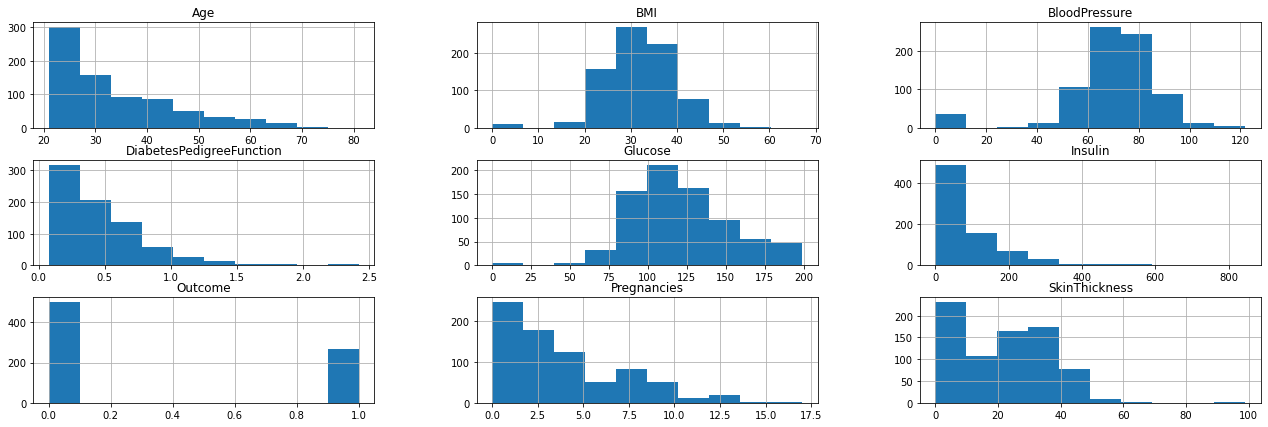

In [5]:
dataset.hist(figsize=(22,7))
plt.show()

In [6]:
dataset.corr()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
dataset[dataset.Outcome == 1].count()

Pregnancies                 268
Glucose                     268
BloodPressure               268
SkinThickness               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

In [8]:
dataset[dataset.Outcome == 0].count()

Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

In [9]:
import seaborn as sns

F:\Ananconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


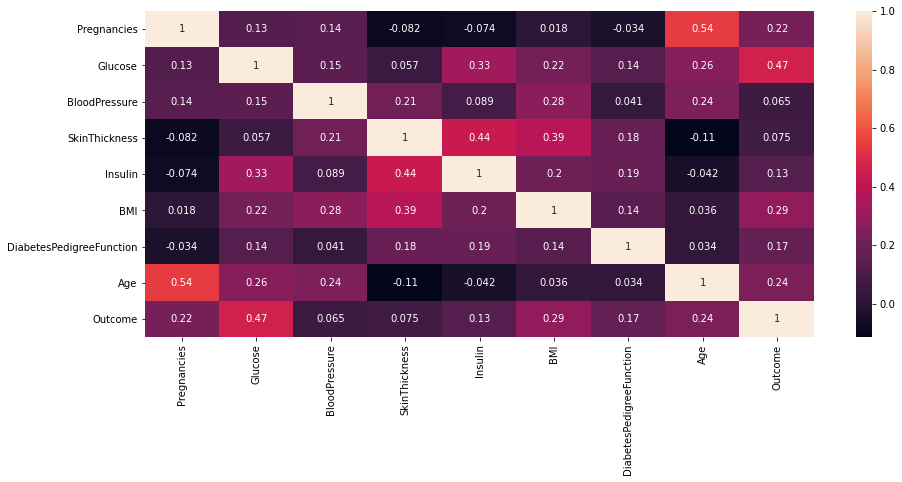

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(dataset.corr(), annot=True)

In [11]:
#Glucose is highly correlated with Outcome (diabetes)

In [12]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [13]:
type(X)

numpy.ndarray

In [14]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [15]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
#we see that all have min value as 0, that cannot be possible in [1:]

In [17]:
dataset.isin([0]).sum()     #total number of zero value

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imp = SimpleImputer(missing_values=0, strategy='mean')    #replacing the zero with mean, except in pregnancies

In [20]:
X[:,1:] = imp.fit_transform(X[:,1:])

In [21]:
print(X[1])

[  1.          85.          66.          29.         155.54822335
  26.6          0.351       31.        ]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [24]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [30]:
accuracy_score(y_test, y_pred_rfc)

0.7316017316017316

In [31]:
acc=cross_val_score(rfc,X_train,y_train,cv=5)
acc.mean()

0.7803219106957424

**Accuracy with RandomForest = 78%**

In [32]:
from xgboost import XGBClassifier

In [33]:
classifier  = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred_clx = classifier.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred_clx)

0.7142857142857143

In [35]:
acc=cross_val_score(classifier,X_train,y_train,cv=5)
acc.mean()

0.7821564555209415

**Accuracy with Xgboost = 78%**

In [36]:
#Lets try with hyperparamter optimization

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5, n_jobs=-1)                           

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='accuracy')

In [40]:
grid_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.0, min_child_weight=3)

In [48]:
classifier1 = XGBClassifier(colsample_bytree=0.7, gamma=0.0, min_child_weight=3)

In [49]:
classifier1.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.0, min_child_weight=3)

In [50]:
classifier1.score(X_test, y_test)

0.7402597402597403

In [51]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier1,X_train,y_train,cv=5)

In [52]:
score.mean()

0.7933541017653167

In [53]:
y_pred_xhy = classifier1.predict(X_test)

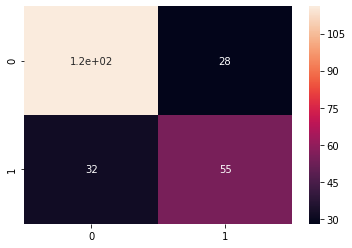

In [54]:
cm  = confusion_matrix(y_test, y_pred_xhy)
sns.heatmap(cm, annot=True)

**Accuracy with Xgboost (with hyperparameter tuning) = 80%**

In [ ]:
#Making predictions

In [59]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    

    return classifier1.predict(x)

In [60]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)

array([0], dtype=int64)